In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
# Commodities
commodities_metadata = pd.read_csv('Commodities_metadata.csv')
commodities_data = pd.read_csv('Commodities_data.csv')

In [3]:
commodities_metadata.Ticker.values

array(['BUT1_Comdty', 'C_1_COMB_Comdty', 'CC1_COMB_Comdty',
       'CL1_COMB_Comdty', 'HG1_COMB_Comdty', 'JO1_Comdty', 'KC2_Comdty',
       'LA1_Comdty', 'LH1_COMB_Comdty', 'LN1_Comdty', 'O_1_COMB_Comdty',
       'RR1_COMB_Comdty', 'S_1_COMB_Comdty', 'SB1_Comdty',
       'W_1_COMB_Comdty'], dtype=object)

In [4]:
commodities_metadata

,Ticker,Commodity,SECURITY_NAME,CRNCY,QUOTE_UNITS
0,BUT1_Comdty,Butter,Generic 1st 'BUT' Future,EUR,EUR/MT
1,C_1_COMB_Comdty,Corn,Generic 1st 'C ' Future,USD,USd/bu.
2,CC1_COMB_Comdty,Cocoa,Generic 1st 'CC' Future,USD,USD/MT
3,CL1_COMB_Comdty,Oil,Generic 1st 'CL' Future,USD,USD/bbl.
4,HG1_COMB_Comdty,Copper,Generic 1st 'HG' Future,USD,USd/lb.
5,JO1_Comdty,Orange Juice,Generic 1st 'JO' Future,USD,USd/lb.
6,KC2_Comdty,Coffee,Generic 2nd 'KC' Future,USD,USd/lb.
7,LA1_Comdty,Aluminum,Generic 1st 'LA' Future,USD,USD/MT
8,LH1_COMB_Comdty,Lean Pork,Generic 1st 'LH' Future,USD,USd/lb.
9,LN1_Comdty,Nickel,Generic 1st 'LN' Future,USD,USD/MT


In [5]:
commodities_data.head()

,Ticker,Date,Open,High,Low
0,BUT1_Comdty,2010-06-01,3750.0,3750.0,3750.0
1,BUT1_Comdty,2010-06-10,3700.0,3700.0,3700.0
2,BUT1_Comdty,2010-06-29,3650.0,3650.0,3650.0
3,BUT1_Comdty,2010-09-02,3700.0,3700.0,3700.0
4,BUT1_Comdty,2011-08-04,3900.0,3900.0,3900.0


** Some basic properties to get a sense of the dataset **

In [6]:
print(commodities_data.Date.min(), commodities_data.Date.max())

2004-09-01 2014-08-29


In [7]:
time_series_by_commodity = commodities_data.groupby(['Date', 'Ticker']).Open.mean().unstack()

In [8]:
time_series_by_commodity.head()

Ticker,BUT1_Comdty,CC1_COMB_Comdty,CL1_COMB_Comdty,C_1_COMB_Comdty,HG1_COMB_Comdty,JO1_Comdty,KC2_Comdty,LA1_Comdty,LH1_COMB_Comdty,LN1_Comdty,O_1_COMB_Comdty,RR1_COMB_Comdty,SB1_Comdty,S_1_COMB_Comdty,W_1_COMB_Comdty
Date,,,,,,,,,,,,,,,
2004-09-01,NaN,1640.0,42.11,230.5,127.80,74.75,72.40,1687.75,65.85,12935.0,143.0,7.75,8.15,625.00,310.25
2004-09-02,NaN,1589.0,43.90,233.0,127.40,85.00,73.95,1674.25,66.65,12620.0,146.5,7.86,8.16,634.50,319.00
2004-09-03,NaN,1580.0,44.07,227.0,124.90,77.00,75.00,1642.50,65.65,12450.0,140.0,7.72,8.20,623.00,308.00
2004-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1648.75,NaN,12420.0,NaN,NaN,NaN,NaN,NaN
2004-09-07,NaN,1550.0,43.57,221.5,123.95,78.50,72.20,1663.75,66.00,12575.0,139.5,7.50,8.06,607.75,304.50


** There seems to be a lot of missing values**

In [9]:
# Check commodities data sparsity
def blank_cell_percentage(series):
    return '{:.2f}%'.format(np.round(100.0 * len(series[series.isnull()]) / len(series), decimals=2))
time_series_by_commodity.apply(blank_cell_percentage, axis='index')

Ticker
BUT1_Comdty        97.05%
CC1_COMB_Comdty     8.24%
CL1_COMB_Comdty     2.14%
C_1_COMB_Comdty     2.06%
HG1_COMB_Comdty     2.18%
JO1_Comdty          4.16%
KC2_Comdty          2.33%
LA1_Comdty         28.27%
LH1_COMB_Comdty     2.14%
LN1_Comdty         46.89%
O_1_COMB_Comdty     5.68%
RR1_COMB_Comdty     6.65%
SB1_Comdty          2.33%
S_1_COMB_Comdty     2.06%
W_1_COMB_Comdty     2.10%
dtype: object

** It appears that butter has an overwhelming percentage of empty price values. We will drop it for now and focus on the rest **

In [10]:
time_series_by_commodity = time_series_by_commodity.drop(['BUT1_Comdty'], axis='columns')

In [11]:
# Compute number of rows that are all null
'{:.3f}%'.format(1 - time_series_by_commodity.dropna(how='all', axis='index').shape[0] / float(time_series_by_commodity.shape[0]))

'0.004%'

** There aren't many rows where all values are empty. We will try to interpolate these values instead. **

** Before proceeding, I want to look at the graph of LA1 aluminum and LN1 nickel, who have been more sparse than others **

<IPython.core.display.Javascript object>


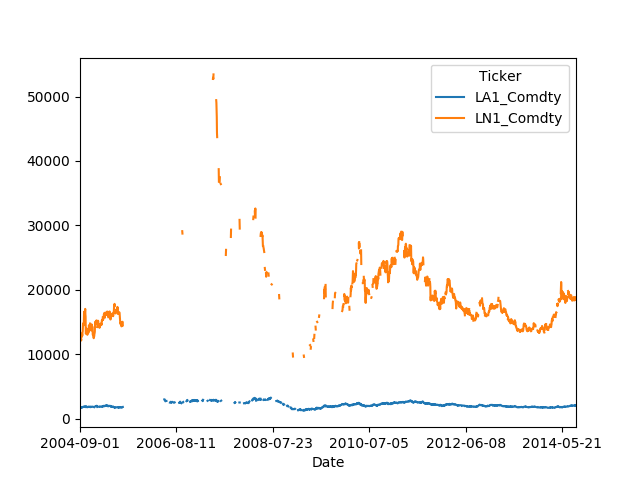

In [12]:
time_series_by_commodity[['LA1_Comdty', 'LN1_Comdty']].plot()
plt.show()

** These two commodities are lost in similar periods, but LA1 has lost data in a period of what seems like very high volatility. Nevertheless, LN1 is lost in a similar period as well. **

** I want to zoom in by expressing the price level as its growth relative to its price on the first day. To do that I will divide the time series by the prices on the first day **

<IPython.core.display.Javascript object>


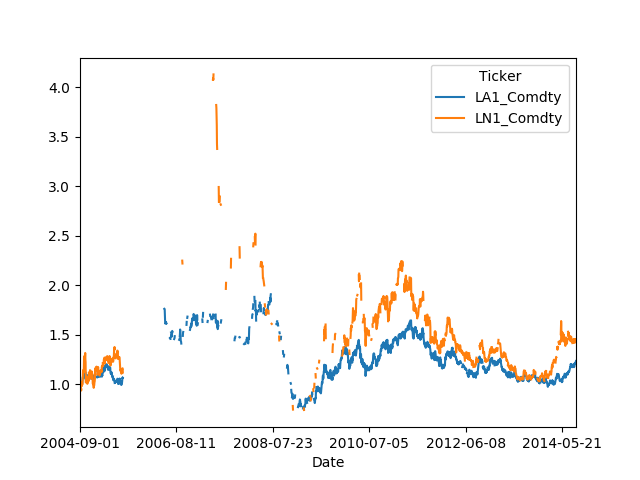

In [13]:
(time_series_by_commodity[['LA1_Comdty', 'LN1_Comdty']] / time_series_by_commodity[['LA1_Comdty', 'LN1_Comdty']].iloc[0]).plot()
plt.show()

** They seem to exhibit some correlation, while LN1 nickel has higher volatility than LA1 aluminum **

** I want to see how well the interpolation behaves. According to my research and conversation with industry professionals, cubic spline seems to be a good approach. Take Nickel as an example **

<IPython.core.display.Javascript object>


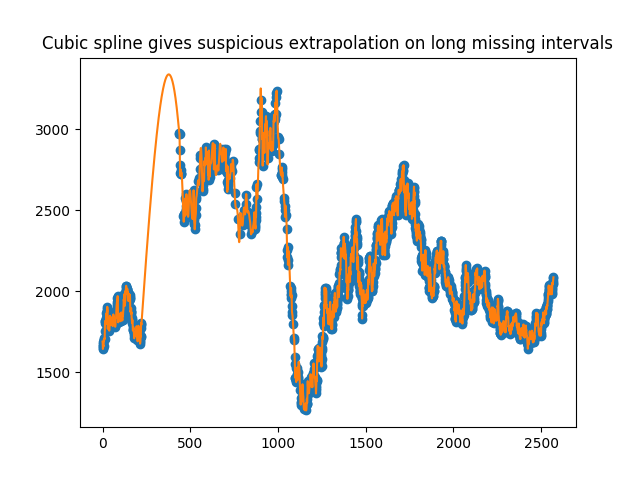

In [15]:
from scipy.interpolate import CubicSpline
y = time_series_by_commodity.LA1_Comdty
x = np.arange(len(y))
y_notnull = y[y.notnull()]
x_notnull = x[y.notnull()]
cs = CubicSpline(x_notnull, y_notnull)
plt.plot(x, y, 'o', x, cs(x), '-')
plt.title('Cubic spline gives suspicious extrapolation on long missing intervals')
plt.show()

<IPython.core.display.Javascript object>


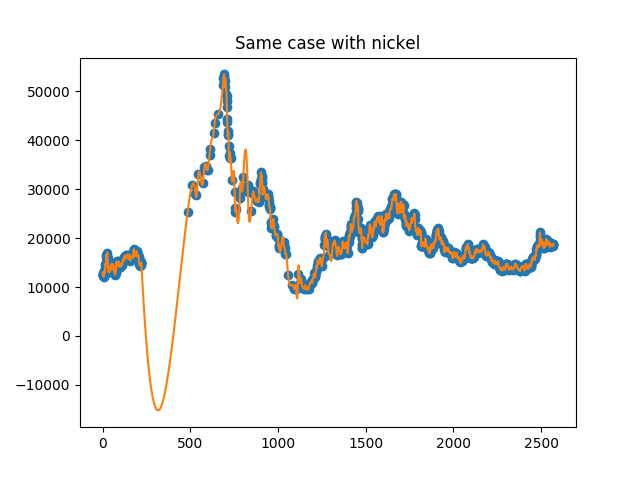

In [16]:
from scipy.interpolate import CubicSpline
y = time_series_by_commodity.LN1_Comdty
x = np.arange(len(y))
y_notnull = y[y.notnull()]
x_notnull = x[y.notnull()]
cs = CubicSpline(x_notnull, y_notnull)
plt.plot(x, y, 'o', x, cs(x), '-')
plt.title('Same case with nickel')
plt.show()

<IPython.core.display.Javascript object>


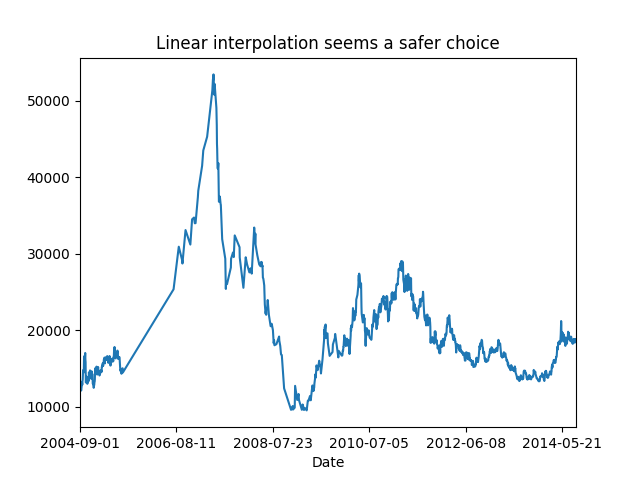

In [17]:
y = time_series_by_commodity.LN1_Comdty.interpolate()
y.plot()
plt.title('Linear interpolation seems a safer choice')
plt.show()

** This method gives a good interpolation for one or two missing data points, but proves ineffective for long intervals of missing data. I will stick to linear for these two commodities. For other less sparse series, however, I will use cubic spline. **

In [18]:
time_series_by_commodity[['LA1_Comdty', 'LN1_Comdty']] = time_series_by_commodity[['LA1_Comdty', 'LN1_Comdty']].interpolate()

In [19]:
Y = time_series_by_commodity[['C_1_COMB_Comdty', 'CC1_COMB_Comdty', 'CL1_COMB_Comdty', 'HG1_COMB_Comdty', 'JO1_Comdty', 
                              'KC2_Comdty', 'LH1_COMB_Comdty', 'O_1_COMB_Comdty', 'RR1_COMB_Comdty', 'S_1_COMB_Comdty', 
                              'SB1_Comdty', 'W_1_COMB_Comdty']]
x = np.arange(len(Y))
time_series_by_commodity[['C_1_COMB_Comdty', 'CC1_COMB_Comdty', 'CL1_COMB_Comdty', 'HG1_COMB_Comdty', 'JO1_Comdty', 
                              'KC2_Comdty', 'LH1_COMB_Comdty', 'O_1_COMB_Comdty', 'RR1_COMB_Comdty', 'S_1_COMB_Comdty', 
                              'SB1_Comdty', 'W_1_COMB_Comdty']] \
= Y.apply(lambda y: CubicSpline(x[y.notnull()], y[y.notnull()])(x))

In [20]:
# Check sparsity now
time_series_by_commodity.apply(blank_cell_percentage, axis='index')

Ticker
CC1_COMB_Comdty    0.00%
CL1_COMB_Comdty    0.00%
C_1_COMB_Comdty    0.00%
HG1_COMB_Comdty    0.00%
JO1_Comdty         0.00%
KC2_Comdty         0.00%
LA1_Comdty         0.00%
LH1_COMB_Comdty    0.00%
LN1_Comdty         0.00%
O_1_COMB_Comdty    0.00%
RR1_COMB_Comdty    0.00%
SB1_Comdty         0.00%
S_1_COMB_Comdty    0.00%
W_1_COMB_Comdty    0.00%
dtype: object

<IPython.core.display.Javascript object>


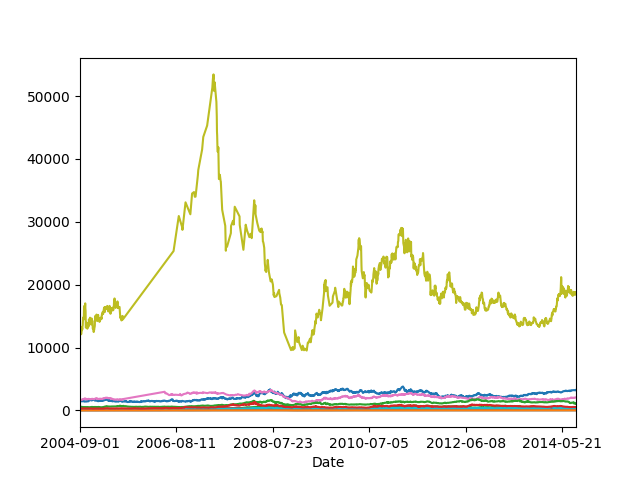

In [21]:
# Interpolated time series
time_series_by_commodity.plot()
plt.legend().remove()
plt.show()

** Because the commodities are listed in dollars, so their rises and drops were not on the same scale. Now I will adjust their scale by dividing all price series by the price on the first day, so all instruments start from 1 **

In [22]:
time_series_by_commodity = time_series_by_commodity / time_series_by_commodity.iloc[0]
time_series_by_commodity.head()

Ticker,CC1_COMB_Comdty,CL1_COMB_Comdty,C_1_COMB_Comdty,HG1_COMB_Comdty,JO1_Comdty,KC2_Comdty,LA1_Comdty,LH1_COMB_Comdty,LN1_Comdty,O_1_COMB_Comdty,RR1_COMB_Comdty,SB1_Comdty,S_1_COMB_Comdty,W_1_COMB_Comdty
Date,,,,,,,,,,,,,,
2004-09-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2004-09-02,0.968902,1.042508,1.010846,0.996870,1.137124,1.021409,0.992001,1.012149,0.975647,1.024476,1.014194,1.001227,1.015200,1.028203
2004-09-03,0.963415,1.046545,0.984816,0.977308,1.030100,1.035912,0.973189,0.996963,0.962505,0.979021,0.996129,1.006135,0.996800,0.992748
2004-09-06,0.965849,1.040439,0.969182,0.961955,1.020182,1.022815,0.976892,0.998774,0.960186,0.967361,0.976288,1.007213,0.984076,0.977507
2004-09-07,0.945122,1.034671,0.960954,0.969875,1.050167,0.997238,0.985780,1.002278,0.972169,0.975524,0.967742,0.988957,0.972400,0.981467


<IPython.core.display.Javascript object>


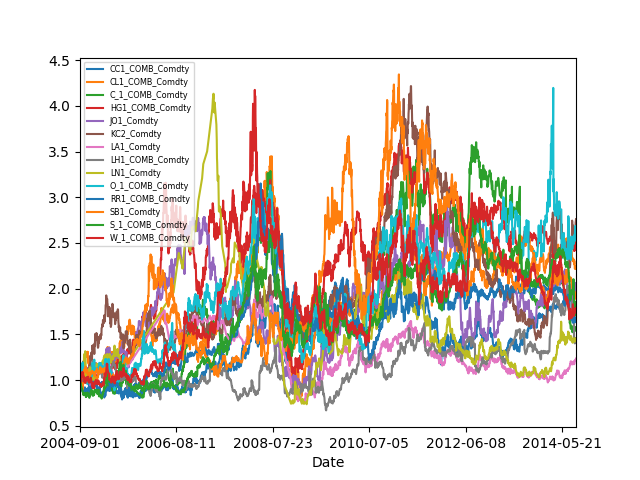

In [23]:
time_series_by_commodity.plot()
plt.legend(fontsize='xx-small', loc='upper left')
plt.show()

** I am interested in seeing what the final returns were for each asset **

<IPython.core.display.Javascript object>


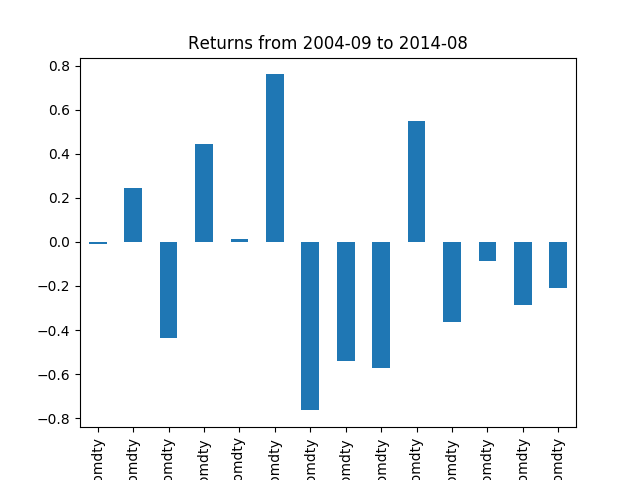

In [24]:
final_returns = time_series_by_commodity.iloc[-1] - time_series_by_commodity.iloc[0]
(final_returns - 1).plot.bar()
plt.yticks()
#plt.axhline(y=1, color='black')
plt.title('Returns from 2004-09 to 2014-08')
plt.show()

** Autocorrelation plot does not show significant relationship between certain lag correlations **

<IPython.core.display.Javascript object>


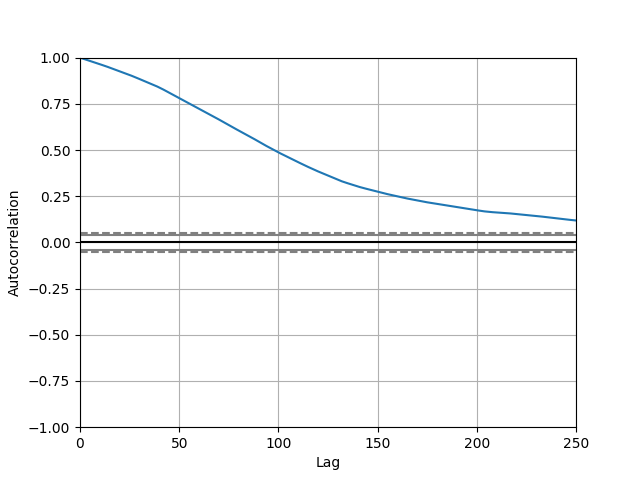

In [25]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(time_series_by_commodity.CL1_COMB_Comdty.dropna())
plt.xlim(0, 250)
plt.show()

In [26]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(time_series_by_commodity.CL1_COMB_Comdty.dropna(), order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

d:\python\python35\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                             ARIMA Model Results                              
Dep. Variable:      D.CL1_COMB_Comdty   No. Observations:                 2571
Model:                 ARIMA(5, 1, 0)   Log Likelihood                4724.163
Method:                       css-mle   S.D. of innovations              0.039
Date:                Fri, 29 Sep 2017   AIC                          -9434.327
Time:                        16:40:57   BIC                          -9393.363
Sample:                    09-02-2004   HQIC                         -9419.476
                         - 08-29-2014                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0005      0.001      0.665      0.506      -0.001       0.002
ar.L1.D.CL1_COMB_Comdty    -0.0433      0.020     -2.198      0.028      -0.082      -0.005


** ARIMA is not a very good method to predict commodities prices **

** Now that we have interpolated our data, we turn to find out correlations between different commodities in notebook "commodities-correlations.ipynb" **